In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data=yf.download('TATAMOTORS.NS', start='2018-04-05', end='2023-04-04').reset_index(drop=False)
tata_0 = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [3]:
tata_0.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-05,362.600006,372.350006,359.799988,362.200012,362.200012,28886070
1,2018-04-06,362.000000,368.350006,356.450012,364.100006,364.100006,13297051
2,2018-04-09,361.899994,368.600006,357.000000,358.299988,358.299988,9555113
3,2018-04-10,360.500000,362.350006,351.500000,353.250000,353.250000,8201215
4,2018-04-11,355.000000,357.149994,350.500000,355.799988,355.799988,5622957
5,2018-04-12,358.000000,364.399994,357.000000,358.399994,358.399994,13145938
6,2018-04-13,357.899994,361.000000,354.399994,357.049988,357.049988,5935628
7,2018-04-16,350.799988,352.799988,337.549988,339.149994,339.149994,19157051
8,2018-04-17,342.299988,344.200012,332.600006,336.450012,336.450012,14241074
9,2018-04-18,338.200012,339.750000,333.399994,334.799988,334.799988,6699271


In [120]:
tata_0.tail(13)

,Date,Open,High,Low,Close,Adj Close,Volume
1223,2023-03-15,422.000000,425.000000,410.100006,411.350006,411.350006,7681009
1224,2023-03-16,413.299988,418.500000,405.000000,415.700012,415.700012,11854885
1225,2023-03-17,419.000000,423.450012,414.549988,419.000000,419.000000,8658701
1226,2023-03-20,415.600006,416.950012,405.500000,410.750000,410.750000,10075022
1227,2023-03-21,412.850006,413.899994,407.700012,412.549988,412.549988,7391950
1228,2023-03-22,416.000000,418.399994,413.750000,416.100006,416.100006,5728054
1229,2023-03-23,416.000000,422.500000,416.000000,419.149994,419.149994,9817460
1230,2023-03-24,419.000000,420.549988,414.799988,416.500000,416.500000,6877960
1231,2023-03-27,416.000000,418.500000,410.250000,412.049988,412.049988,7433933
1232,2023-03-28,414.149994,414.500000,400.450012,401.600006,401.600006,9553659


#EDA

Analysis is only based on Open, High, Low, close price and volume

There is no need of Adj Close

In [5]:
# Removing "Adj Close" columnfrom dataset
tata_1=tata_0.drop(["Adj Close"],axis=1).reset_index(drop=True)
tata_1

,Date,Open,High,Low,Close,Volume
0,2018-04-05,362.600006,372.350006,359.799988,362.200012,28886070
1,2018-04-06,362.000000,368.350006,356.450012,364.100006,13297051
2,2018-04-09,361.899994,368.600006,357.000000,358.299988,9555113
3,2018-04-10,360.500000,362.350006,351.500000,353.250000,8201215
4,2018-04-11,355.000000,357.149994,350.500000,355.799988,5622957
...,...,...,...,...,...,...
1231,2023-03-27,416.000000,418.500000,410.250000,412.049988,7433933
1232,2023-03-28,414.149994,414.500000,400.450012,401.600006,9553659
1233,2023-03-29,401.600006,410.600006,401.600006,409.200012,10478506
1234,2023-03-31,411.350006,421.750000,411.000000,420.799988,11037881


In [6]:
# Finding duplicate columns, if any
tata_1[tata_1.duplicated()]

,Date,Open,High,Low,Close,Volume


In [7]:
# Finding null values, if any
tata_1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
#To check which rows have any missing value under any column
tata_1[tata_1.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume


In [9]:
# Removing the row which have null value
tata_2=tata_1.dropna().reset_index(drop=True)
tata_2

,Date,Open,High,Low,Close,Volume
0,2018-04-05,362.600006,372.350006,359.799988,362.200012,28886070
1,2018-04-06,362.000000,368.350006,356.450012,364.100006,13297051
2,2018-04-09,361.899994,368.600006,357.000000,358.299988,9555113
3,2018-04-10,360.500000,362.350006,351.500000,353.250000,8201215
4,2018-04-11,355.000000,357.149994,350.500000,355.799988,5622957
...,...,...,...,...,...,...
1231,2023-03-27,416.000000,418.500000,410.250000,412.049988,7433933
1232,2023-03-28,414.149994,414.500000,400.450012,401.600006,9553659
1233,2023-03-29,401.600006,410.600006,401.600006,409.200012,10478506
1234,2023-03-31,411.350006,421.750000,411.000000,420.799988,11037881


In [10]:
# Checking wether if there exist any null values
tata_2[tata_2.isnull().any(axis=1)]


,Date,Open,High,Low,Close,Volume


In [11]:
# Making a copy of dataset as tata
tata=tata_2.copy()
tata

,Date,Open,High,Low,Close,Volume
0,2018-04-05,362.600006,372.350006,359.799988,362.200012,28886070
1,2018-04-06,362.000000,368.350006,356.450012,364.100006,13297051
2,2018-04-09,361.899994,368.600006,357.000000,358.299988,9555113
3,2018-04-10,360.500000,362.350006,351.500000,353.250000,8201215
4,2018-04-11,355.000000,357.149994,350.500000,355.799988,5622957
...,...,...,...,...,...,...
1231,2023-03-27,416.000000,418.500000,410.250000,412.049988,7433933
1232,2023-03-28,414.149994,414.500000,400.450012,401.600006,9553659
1233,2023-03-29,401.600006,410.600006,401.600006,409.200012,10478506
1234,2023-03-31,411.350006,421.750000,411.000000,420.799988,11037881


Discriptive Statistics

In [12]:

tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1236 non-null   datetime64[ns]
 1   Open    1236 non-null   float64       
 2   High    1236 non-null   float64       
 3   Low     1236 non-null   float64       
 4   Close   1236 non-null   float64       
 5   Volume  1236 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 58.1 KB


In [13]:
tata.describe()

,Open,High,Low,Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,275.752629,280.008455,270.850284,275.111529,3.729619e+07
std,130.066939,131.273558,128.448919,129.770176,3.684899e+07
min,66.500000,66.900002,63.500000,65.300003,2.871205e+06
25%,166.887497,170.137497,163.550003,166.924999,1.430685e+07
50%,269.350006,271.925003,262.425003,267.174988,2.514542e+07
75%,410.000000,414.899994,404.250000,408.712494,4.881095e+07
max,531.450012,536.700012,520.250000,530.150024,3.905778e+08


In [14]:
tata.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999359,0.999291,0.998725,-0.318751
High,0.999359,1.000000,0.999162,0.999517,-0.302595
Low,0.999291,0.999162,1.000000,0.999446,-0.324722
Close,0.998725,0.999517,0.999446,1.000000,-0.310399
Volume,-0.318751,-0.302595,-0.324722,-0.310399,1.000000


Every attributes are highly corelated except volume

In [15]:
# converting the date column in to datetime 
tata['Date']=pd.to_datetime(tata['Date'],format='%Y-%m-%d')
tata

,Date,Open,High,Low,Close,Volume
0,2018-04-05,362.600006,372.350006,359.799988,362.200012,28886070
1,2018-04-06,362.000000,368.350006,356.450012,364.100006,13297051
2,2018-04-09,361.899994,368.600006,357.000000,358.299988,9555113
3,2018-04-10,360.500000,362.350006,351.500000,353.250000,8201215
4,2018-04-11,355.000000,357.149994,350.500000,355.799988,5622957
...,...,...,...,...,...,...
1231,2023-03-27,416.000000,418.500000,410.250000,412.049988,7433933
1232,2023-03-28,414.149994,414.500000,400.450012,401.600006,9553659
1233,2023-03-29,401.600006,410.600006,401.600006,409.200012,10478506
1234,2023-03-31,411.350006,421.750000,411.000000,420.799988,11037881


In [16]:
# Setting the date column as index
tata=tata.set_index('Date')
tata

,Open,High,Low,Close,Volume
Date,,,,,
2018-04-05,362.600006,372.350006,359.799988,362.200012,28886070
2018-04-06,362.000000,368.350006,356.450012,364.100006,13297051
2018-04-09,361.899994,368.600006,357.000000,358.299988,9555113
2018-04-10,360.500000,362.350006,351.500000,353.250000,8201215
2018-04-11,355.000000,357.149994,350.500000,355.799988,5622957
...,...,...,...,...,...
2023-03-27,416.000000,418.500000,410.250000,412.049988,7433933
2023-03-28,414.149994,414.500000,400.450012,401.600006,9553659
2023-03-29,401.600006,410.600006,401.600006,409.200012,10478506


#Visualizations

Text(0.5, 1.0, 'Low')

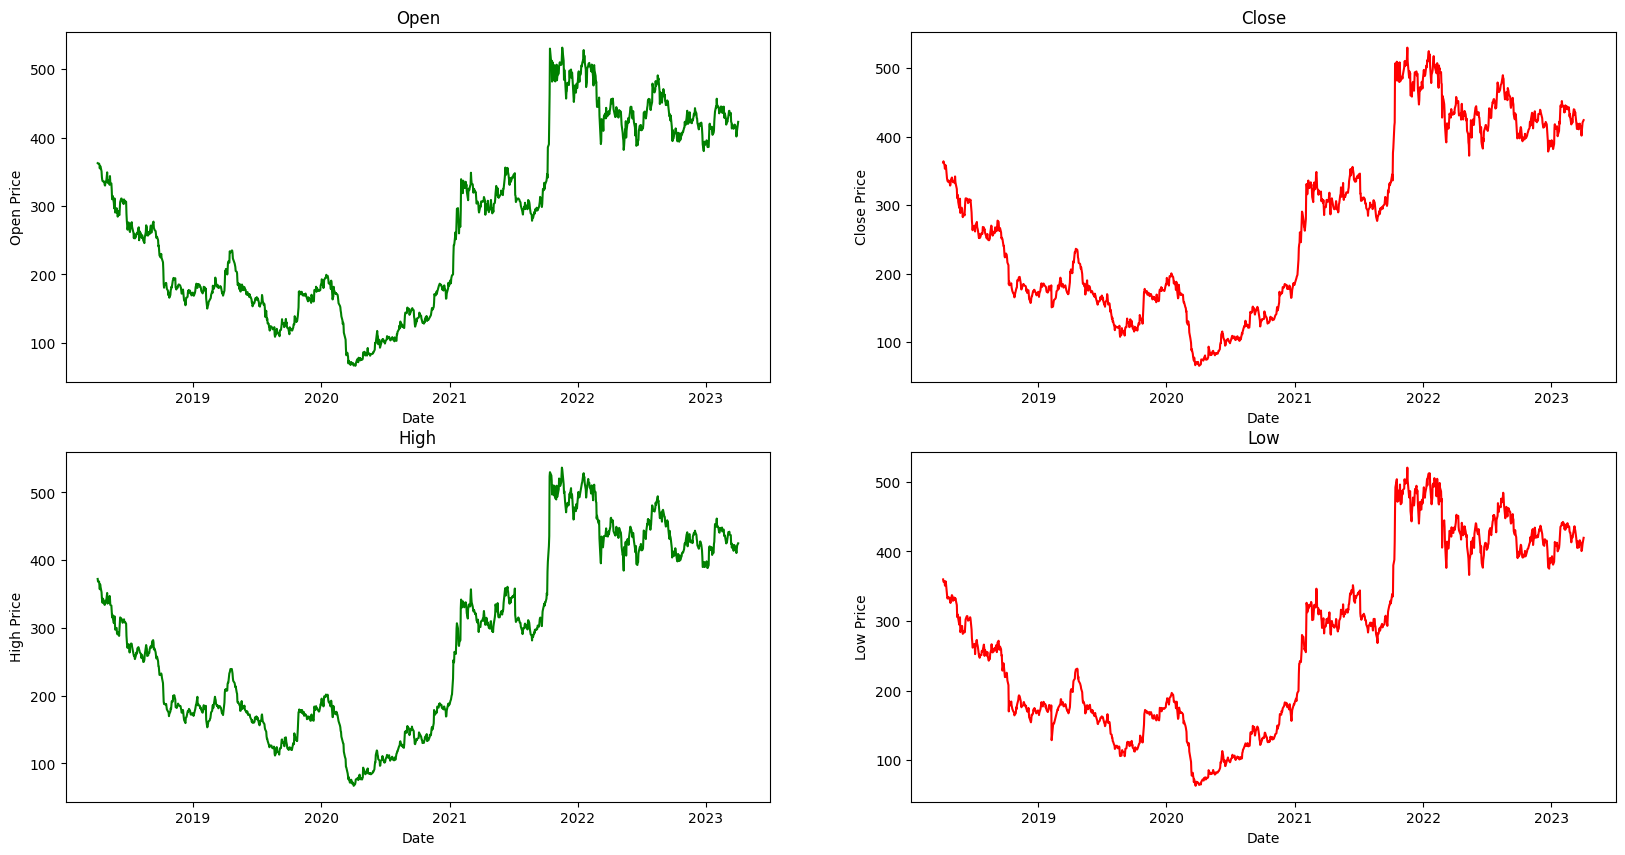

In [17]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(tata['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(tata['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(tata['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(tata['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

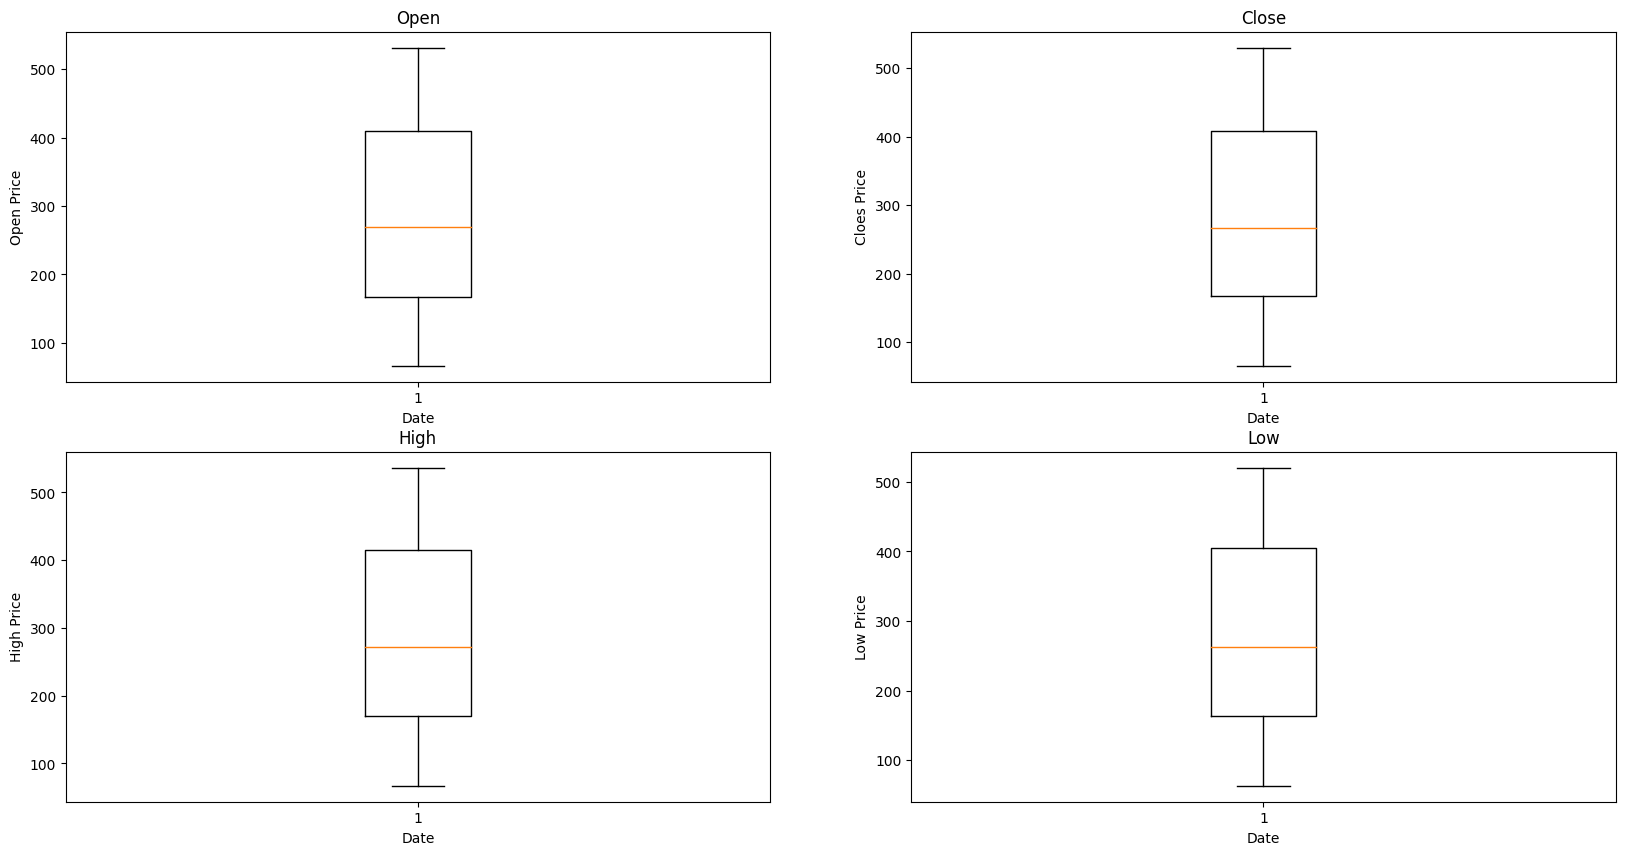

In [18]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(tata['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(tata['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(tata['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(tata['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

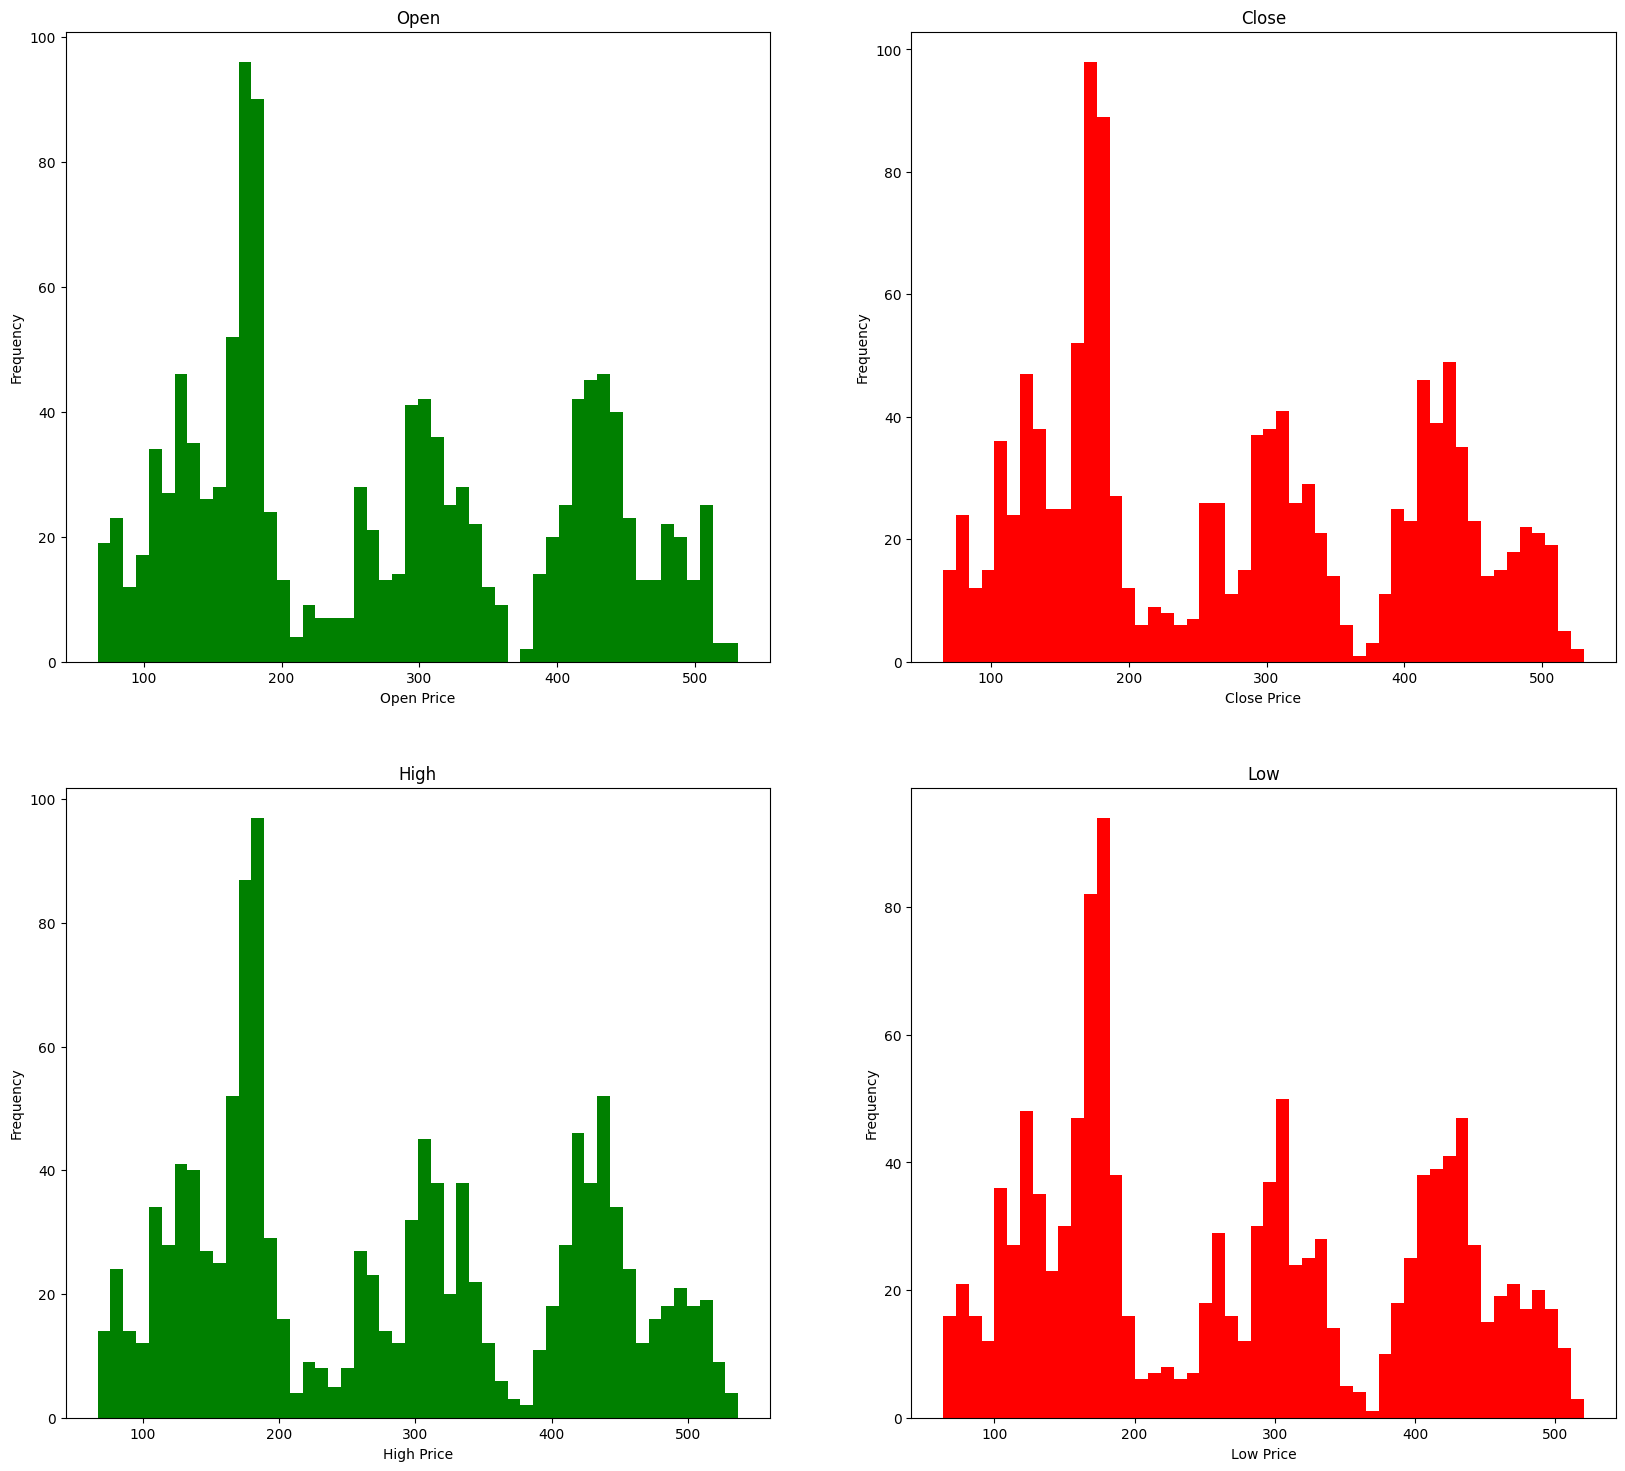

In [19]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(tata['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(tata['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(tata['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(tata['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

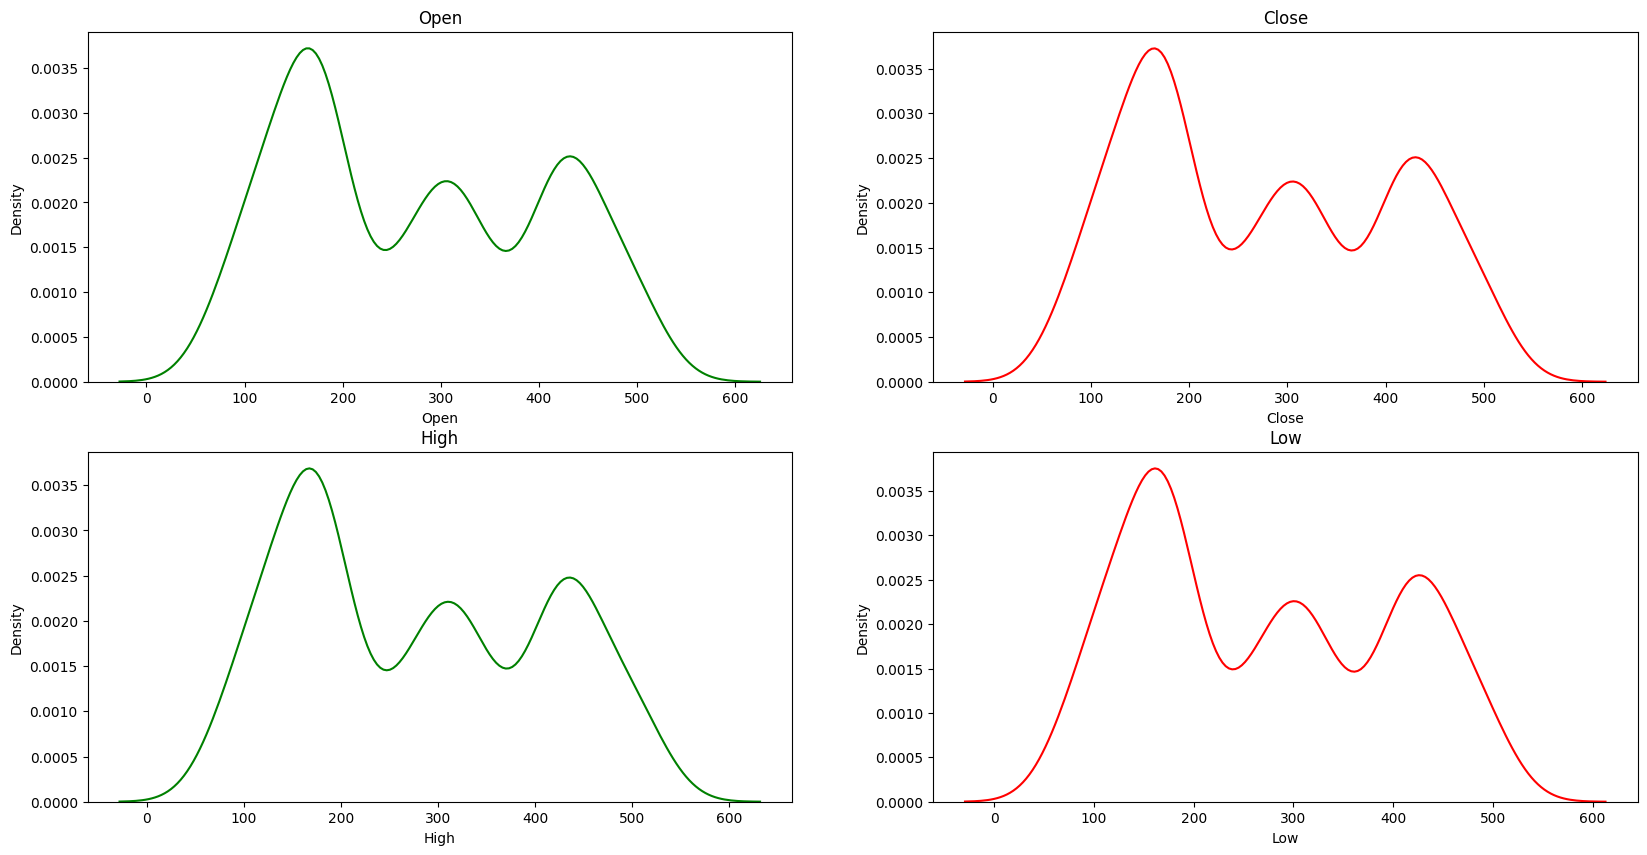

In [20]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(tata['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(tata['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(tata['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(tata['Low'], color='red')
plt.title('Low')

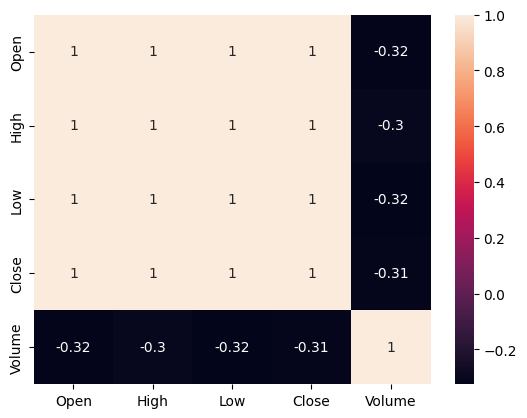

In [21]:
sns.heatmap(tata.corr(),annot=True)
plt.show()

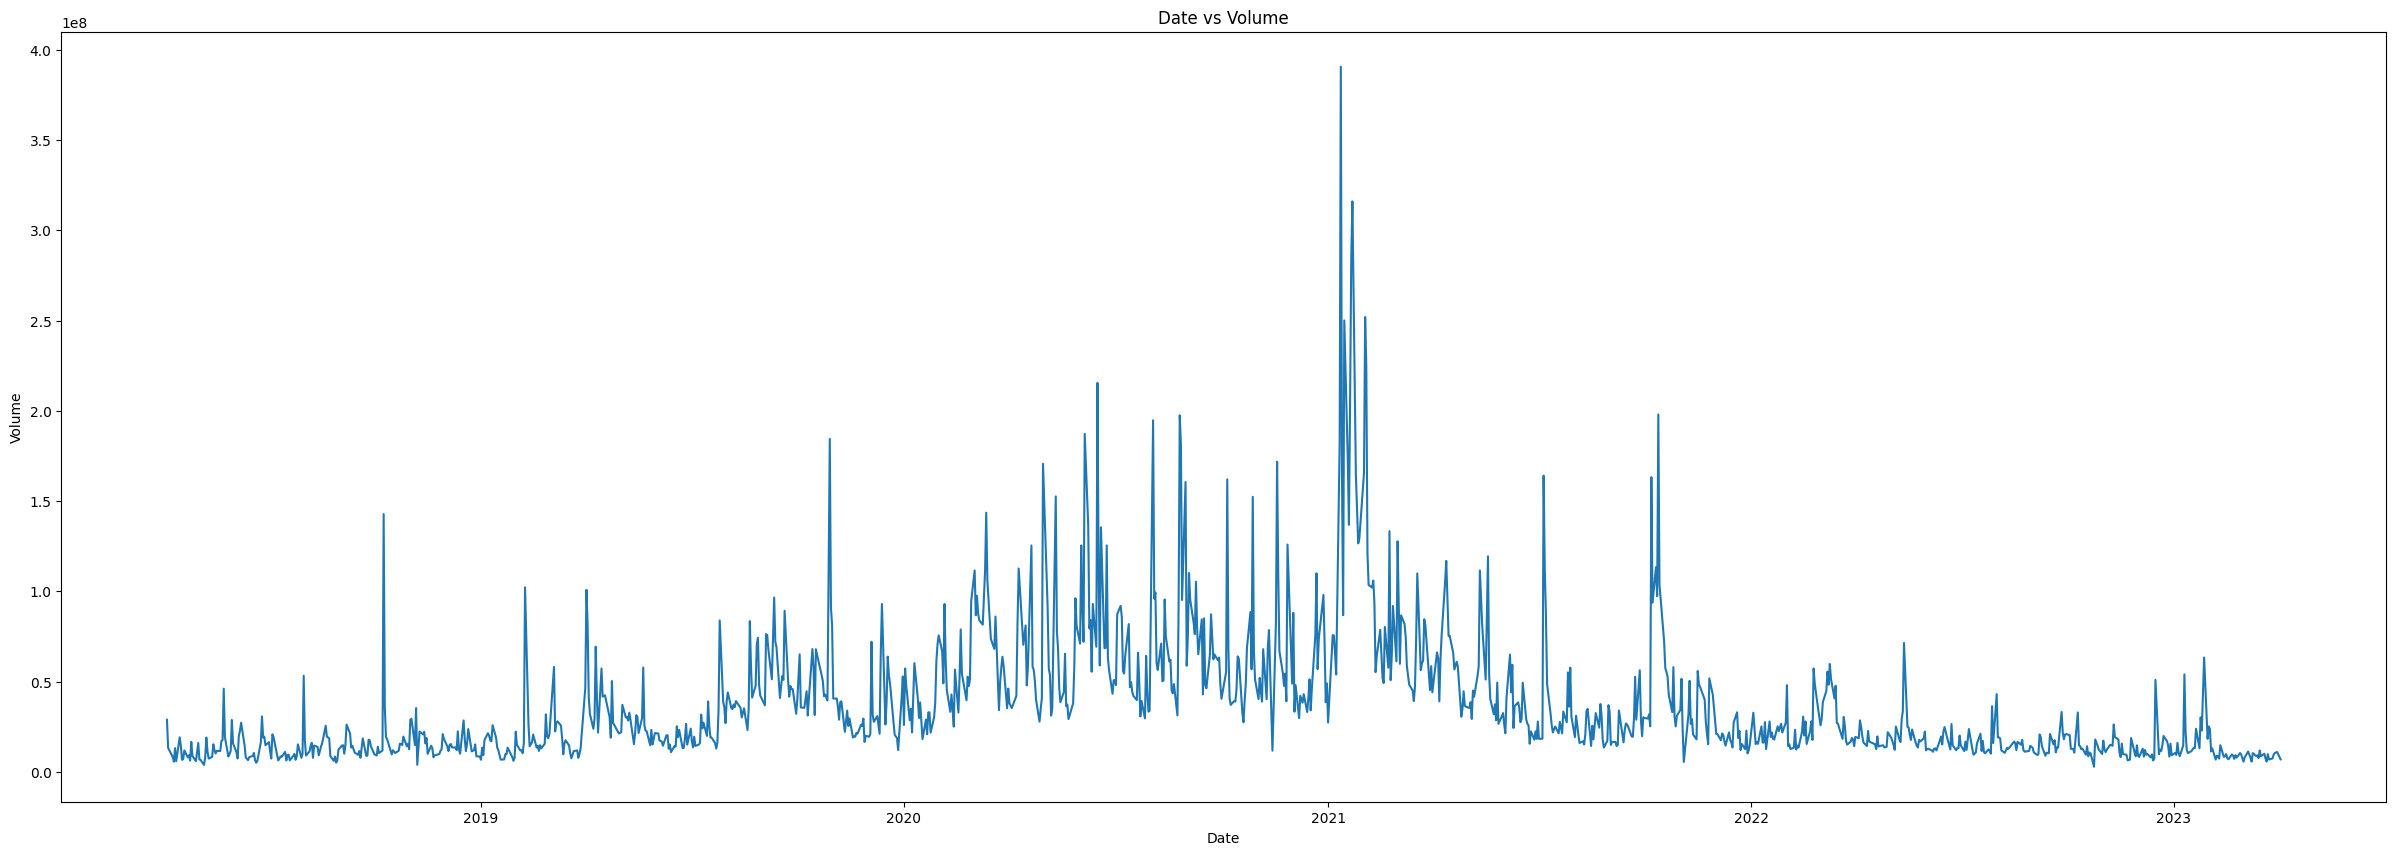

In [22]:
figure=plt.figure(figsize=(30,10))
plt.plot(tata['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()


#Finding long-term and short-term trends

Moving Average

In [23]:
tata_ma=tata.copy()
tata_ma['30-day MA']=tata['Close'].rolling(window=30).mean()
tata_ma['200-day MA']=tata['Close'].rolling(window=200).mean()

In [24]:
tata_ma

,Open,High,Low,Close,Volume,30-day MA,200-day MA
Date,,,,,,,
2018-04-05,362.600006,372.350006,359.799988,362.200012,28886070,NaN,NaN
2018-04-06,362.000000,368.350006,356.450012,364.100006,13297051,NaN,NaN
2018-04-09,361.899994,368.600006,357.000000,358.299988,9555113,NaN,NaN
2018-04-10,360.500000,362.350006,351.500000,353.250000,8201215,NaN,NaN
2018-04-11,355.000000,357.149994,350.500000,355.799988,5622957,NaN,NaN
...,...,...,...,...,...,...,...
2023-03-27,416.000000,418.500000,410.250000,412.049988,7433933,426.996667,426.31550
2023-03-28,414.149994,414.500000,400.450012,401.600006,9553659,425.681668,426.18100
2023-03-29,401.600006,410.600006,401.600006,409.200012,10478506,424.636669,426.08675


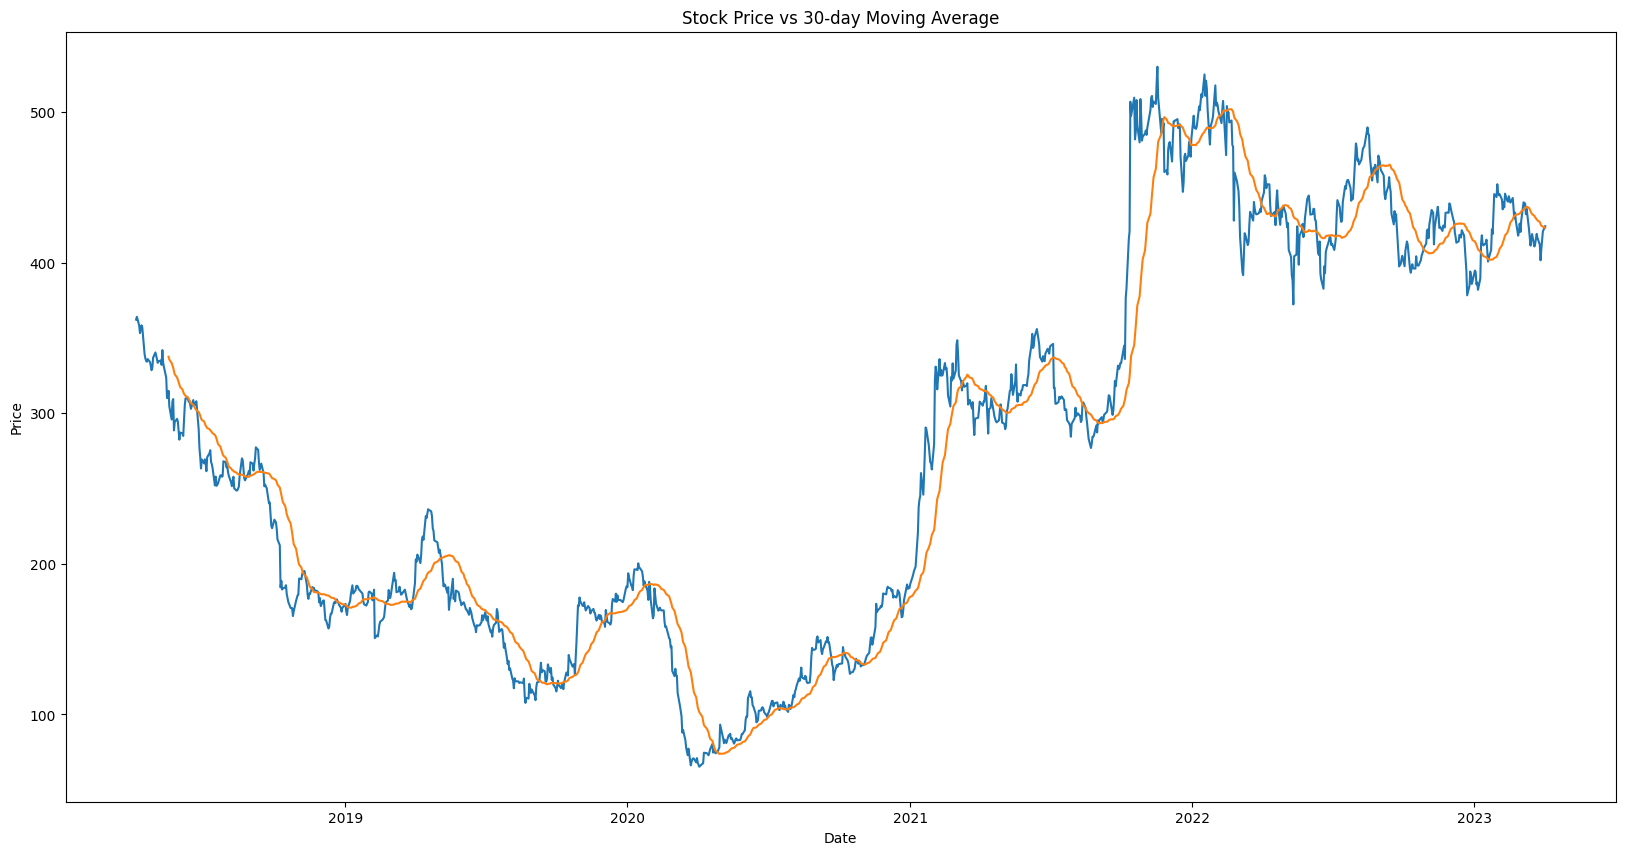

In [25]:
plt.figure(figsize=(20,10))
plt.plot(tata_ma['Close'],label='Original data')
plt.plot(tata_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

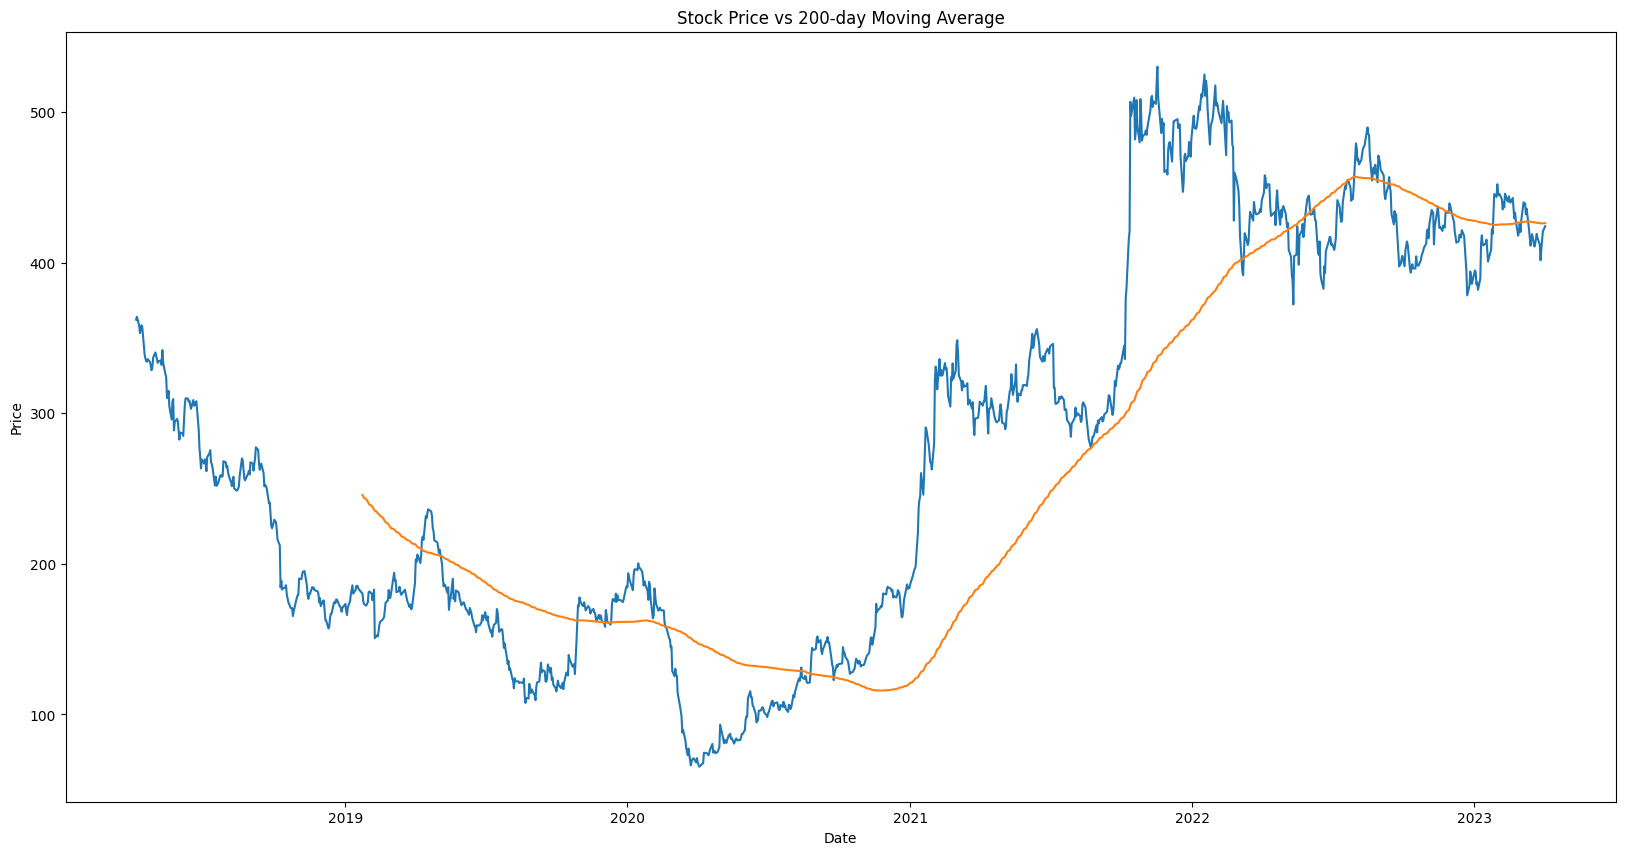

In [26]:
plt.figure(figsize=(20,10))
plt.plot(tata_ma['Close'],label='Original data')
plt.plot(tata_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Model Building

In [27]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [28]:
tata

,Open,High,Low,Close,Volume
Date,,,,,
2018-04-05,362.600006,372.350006,359.799988,362.200012,28886070
2018-04-06,362.000000,368.350006,356.450012,364.100006,13297051
2018-04-09,361.899994,368.600006,357.000000,358.299988,9555113
2018-04-10,360.500000,362.350006,351.500000,353.250000,8201215
2018-04-11,355.000000,357.149994,350.500000,355.799988,5622957
...,...,...,...,...,...
2023-03-27,416.000000,418.500000,410.250000,412.049988,7433933
2023-03-28,414.149994,414.500000,400.450012,401.600006,9553659
2023-03-29,401.600006,410.600006,401.600006,409.200012,10478506


In [29]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(tata['Close'])
close_df

,Close
Date,
2018-04-05,362.200012
2018-04-06,364.100006
2018-04-09,358.299988
2018-04-10,353.250000
2018-04-11,355.799988
...,...
2023-03-27,412.049988
2023-03-28,401.600006
2023-03-29,409.200012


In [30]:
print(close_df.shape)

(1236, 1)


In [31]:
close_df=close_df.reset_index()

In [32]:
close_df['Date']

0      2018-04-05
1      2018-04-06
2      2018-04-09
3      2018-04-10
4      2018-04-11
          ...    
1231   2023-03-27
1232   2023-03-28
1233   2023-03-29
1234   2023-03-31
1235   2023-04-03
Name: Date, Length: 1236, dtype: datetime64[ns]

#Normalizing / scaling close value between 0 to 1

In [33]:

close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(1236, 1)


In [109]:
import pickle

In [110]:
from pickle import dump
from pickle import load

In [111]:
with open('scaler_pickle','wb') as files:
  pickle.dump(scaler,files)


In [112]:
with open('scaler_pickle','rb') as files:
  lr=pickle.load(files)

In [119]:
pickle.dump(scaler, open('Standard', 'wb'))

#Split data for training and testing

Ratio for training and testing data is 86:14

In [34]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1062, 1)
test_data:  (174, 1)


#Create new dataset according to requirement of time-series prediction

In [35]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [36]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1048, 13)
y_train:  (1048,)
X_test:  (160, 13)
y_test (160,)


Algorithms

Support vector regression - SVR

In [37]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [38]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1048, 1)
Test data prediction: (160, 1)


In [39]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

#Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [40]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  16.487900003628106
Train data MSE:  271.85084652963974
Test data MAE:  13.37633788530981
-------------------------------------------------------------------------------------
Test data RMSE:  16.562708892642906
Test data MSE:  274.3233258624324
Test data MAE:  14.543097704944609


#Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [41]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9820571179959316
Test data explained variance regression score: 0.858970838513489


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [42]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9820039303147834
Test data R2 score: 0.4852671301057869


#Comparision between original stock close price vs predicted close price

In [43]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1236, 1)
Test predicted data:  (1236, 1)


**Predicting next 30 days**

In [44]:

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


**Plotting last 15 days and next predicted 30 days**

In [45]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [46]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting whole closing stock price with prediction**

In [47]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Random Forest Regressor - RF

In [48]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [49]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1048, 1)
Test data prediction: (160, 1)


In [50]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

**Evaluation metrices RMSE, MSE and MAE**

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [51]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3.254658394952481
Train data MSE:  10.592801267834659
Test data MAE:  2.1586555274934307
-------------------------------------------------------------------------------------
Test data RMSE:  9.820416568056924
Test data MSE:  96.44058157016693
Test data MAE:  7.6723906688689825


Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [52]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9992987870542704
Test data explained variance regression score: 0.8374522250412988


#R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [53]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.999298774338167
Test data R2 score: 0.8190415008646659


**
**Comparision between original stock close price vs predicted close price**

In [54]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1236, 1)
Test predicted data:  (1236, 1)


*Predicting next 30 days*

In [55]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


**Plotting last 15 days and next predicted 30 days**

In [56]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [57]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting whole closing stock price with prediction**

In [58]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#K-nearest neighgbour - KNN

In [59]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [60]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1048, 1)
Test data prediction: (160, 1)


In [61]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

**Evaluation metrices RMSE, MSE and MAE**

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [62]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  10.999040923856906
Train data MSE:  120.978901244679
Test data MAE:  6.808565414168874
-------------------------------------------------------------------------------------
Test data RMSE:  13.960719929633918
Test data MSE:  194.90170095367768
Test data MAE:  11.339687420771668


Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [63]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9920156505098233
Test data explained variance regression score: 0.6848493346334149


**R2 score for regression**

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [64]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9919913998244518
Test data R2 score: 0.6342917192194594


#Comparision between original stock close price vs predicted close price

In [65]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1236, 1)
Test predicted data:  (1236, 1)


**Predicting next 30 days**

In [66]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


***Plotting last 15 days and next predicted 30 days***

In [67]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [68]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting whole closing stock price with prediction**

In [69]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#LSTM

In [121]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1048, 13, 1)
X_test:  (160, 13, 1)


# LSTM **model** **structure**

In [122]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [123]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
33/33 [==============================] - 8s 59ms/step - loss: 0.0444 - val_loss: 0.0013
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 5/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 6/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 8/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 9/100
33/33 [==============================] - 1s 24ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 10/100
33/33 [==============================] - 1s 35ms/step - loss: 0.0022 - val_loss: 0.0022

In [113]:
from pickle import dump
from pickle import load

In [116]:
with open('lstm_pickle','wb') as files:
  pickle.dump("lstm_pickle",files)

In [117]:
with open('lstm_pickle','rb') as files:
  lr=pickle.load(files)

In [125]:
pickle.dump(model, open('LSTM', 'wb'))

In [127]:
model.save('LSTM.h5')

In [74]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 6ms/step


((1048, 1), (160, 1))

In [75]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [76]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  9.058436219105522
Train data MSE:  82.05526673560273
Test data MAE:  6.2989328107761065
-------------------------------------------------------------------------------------
Test data RMSE:  8.21238597190345
Test data MSE:  67.44328335151657
Test data MAE:  6.2459321975707995


*Explained variance regression score*

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [77]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9945960581364387
Test data explained variance regression score: 0.8863630168038676



R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [78]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9945680790879864
Test data R2 score: 0.8734512470440675


**Comparision between original stock close price vs predicted close price**

In [79]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1236, 1)
Test predicted data:  (1236, 1)


***Predicting next 30 days***

In [80]:

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30



Plotting last 15 days and next predicted 30 days

In [81]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [82]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Plotting whole closing stock price with prediction

In [83]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#GRU (Gated Recurrent Unit)

In [84]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1048, 13, 1)
X_test:  (160, 13, 1)


In [85]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
33/33 [==============================] - 11s 72ms/step - loss: 0.0181 - val_loss: 0.0018
Epoch 2/100
33/33 [==============================] - 1s 31ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 3/100
33/33 [==============================] - 1s 30ms/step - loss: 0.0013 - val_loss: 8.1406e-04
Epoch 4/100
33/33 [==============================] - 1s 39ms/step - loss: 0.0012 - val_loss: 8.3374e-04
Epoch 5/100
33/33 [==============================] - 1s 42ms/step - loss: 0.0012 - val_loss: 6.7306e-04
Epoch 6/100
33/33 [==============================] - 1s 30ms/step - loss: 0.0011 - val_loss: 6.8274e-04
Epoch 7/100
33/33 [==============================] - 2s 46ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 8/100
33/33 [==============================] - 2s 47ms/step - loss: 9.8745e-04 - val_loss: 7.2850e-04
Epoch 9/100
33/33 [==============================] - 1s 30ms/step - loss: 8.9299e-04 - val_loss: 5.7529e-04
Epoch 10/100
33/33 [==============================] - 1s 29ms/step 

In [88]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 8ms/step


((1048, 1), (160, 1))

In [89]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [90]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  9.21357252178022
Train data MSE:  84.88991861410352
Test data MAE:  6.307501137711619
-------------------------------------------------------------------------------------
Test data RMSE:  10.99201557246543
Test data MSE:  120.8244063453225
Test data MAE:  9.116355705261231


Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [91]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9951816202876054
Test data explained variance regression score: 0.8947657082852749



R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [92]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9943804298921497
Test data R2 score: 0.7732883514886351


**Comparision between original stock close price vs predicted close price**

In [93]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1236, 1)
Test predicted data:  (1236, 1)


In [94]:
plotdf.head(100)

,Date,original_close,train_predicted_close,test_predicted_close
0,2018-04-05,362.200012,NaN,NaN
1,2018-04-06,364.100006,NaN,NaN
2,2018-04-09,358.299988,NaN,NaN
3,2018-04-10,353.250000,NaN,NaN
4,2018-04-11,355.799988,NaN,NaN
...,...,...,...,...
95,2018-08-20,270.100006,261.465363,NaN
96,2018-08-21,268.799988,273.412537,NaN
97,2018-08-23,256.899994,273.535217,NaN
98,2018-08-24,255.500000,261.659851,NaN


***Predicting next 30 days***

In [95]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days

In [96]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [97]:

temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction

In [98]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [99]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

,svr,rf,knn,lstm,gru
0,362.200012,362.200012,362.200012,362.200012,362.200012
1,364.100006,364.100006,364.100006,364.100006,364.100006
2,358.299988,358.299988,358.299988,358.299988,358.299988
3,353.250000,353.250000,353.250000,353.250000,353.250000
4,355.799988,355.799988,355.799988,355.799988,355.799988
...,...,...,...,...,...
1261,443.202251,434.255999,403.184615,464.162065,591.574383
1262,430.570911,434.250999,410.653849,465.169860,594.071524
1263,418.935384,434.262499,414.530769,466.146927,596.326171
1264,409.228785,434.375999,416.257693,467.093766,598.357443


#Conclusion Chart

In [100]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [101]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

,Model,Train R2 Score,Test R2 Score
0,SVR,0.982004,0.485267
1,Random Forest,0.999299,0.819042
2,KNN,0.991991,0.634292
3,LSTM,0.994568,0.873451
4,GRU,0.994380,0.773288


In [102]:
import pickle

In [103]:
from pickle import dump
from pickle import load

In [104]:
with open('model_pickle','wb') as files:
  pickle.dump(model,files)


In [105]:
with open('model_pickle','rb') as files:
  lr=pickle.load(files)



In [106]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import joblib

In [108]:
joblib.dump(model,'model_jlib')

['model_jlib']